<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Hola, Eduardo! Ya casi tienes el ejercicio, solamente te pido si de favor en la siguiente línea puede agregar la información general sobre esas bases que usamos para poder identificar si la diferencia entre grupos es muy alta que este haciendo que el valor p sea de nan. Te dejo un listado de lo que debemos agregar para cada una de las pruebas:
    
    - Información general de la base y de las variables que usamos para la prueba
    - Un gráfico que compare la media entre grupos
    - Las estadísticas generales de esa variable para cada grupo (media, varianza, desviación) 
    - imprimir las primeras líneas de la base de datos
    
</div>

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Asegurémonos de que los datos de churn_date no tengan valores NaN que afecten el análisis
merged_data_with_plan['churn_date'].fillna(pd.Timestamp('2099-12-31'), inplace=True)

# Verificar algunas filas del DataFrame
print("\nPrimeras líneas de merged_data_with_plan:")
print(merged_data_with_plan.head())

# Verificar valores únicos en la columna 'city'
print("\nValores únicos en la columna 'city':")
print(merged_data_with_plan['city'].unique())

# Verificar si hay valores nulos en las columnas relevantes
print("\nValores nulos en las columnas relevantes:")
print(merged_data_with_plan[['city', 'monthly_revenue']].isnull().sum())

# Filtrar los datos por área NY-NJ y otras regiones
ny_nj_data = merged_data_with_plan[merged_data_with_plan['city'].str.contains('ny-nj', na=False)]
other_region_data = merged_data_with_plan[~merged_data_with_plan['city'].str.contains('ny-nj', na=False)]

# Verificar el número de filas después del filtrado
print("\nNúmero de filas en ny_nj_data:", len(ny_nj_data))
print("Número de filas en other_region_data:", len(other_region_data))

# Obtener los ingresos mensuales por área
ny_nj_revenue = ny_nj_data['monthly_revenue'].dropna()
other_region_revenue = other_region_data['monthly_revenue'].dropna()

# Estadísticas generales
print("\nEstadísticas generales para ingresos en NY-NJ:")
print(ny_nj_revenue.describe())

print("\nEstadísticas generales para ingresos en otras regiones:")
print(other_region_revenue.describe())

# Gráfico que compare la media entre grupos
labels = ['NY-NJ', 'Otras regiones']
means = [ny_nj_revenue.mean(), other_region_revenue.mean()]

plt.bar(labels, means, color=['blue', 'orange'])
plt.xlabel('Región')
plt.ylabel('Ingreso Promedio')
plt.title('Comparación de Ingresos Promedios entre NY-NJ y Otras Regiones')
plt.show()

# Realizar la prueba t de muestras independientes
t_statistic, p_value = stats.ttest_ind(ny_nj_revenue, other_region_revenue, equal_var=False)  # equal_var=False para asumir varianzas diferentes

# Mostrar los resultados
print("\nResultados de la prueba t:")
print(f"Estadístico t: {t_statistic}")
print(f"Valor p: {p_value}")

# Nivel de significancia (alfa)
alpha = 0.05

# Interpretar los resultados
if p_value < alpha:
    print("\nRechazamos la hipótesis nula: El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.")
else:
    print("\nNo podemos rechazar la hipótesis nula: El ingreso promedio de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones.")

NameError: name 'merged_data_with_plan' is not defined

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes. En estos casos es recomendables completarlas con cero para el desarrollo de los análisis y en el caso de las pruebas de hipótesis si llegaramos a usar estas variables podríamos hacer el filtro por valores nulos

</div>

¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [2]:
# Cargar todas las librerías

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import factorial 
from scipy import stats as st

## Cargar datos

In [3]:
# Carga los archivos de datos en diferentes DataFrames
calls=pd.read_csv("/datasets/megaline_calls.csv")
internet=pd.read_csv("/datasets/megaline_internet.csv")
message=pd.read_csv("/datasets/megaline_messages.csv")
plan=pd.read_csv("/datasets/megaline_plans.csv")
users=pd.read_csv("/datasets/megaline_users.csv")

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [4]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

plan.info()
plan = plan.rename(columns={"mb_per_month_included": "gb_per_month_included"})
plan["gb_per_month_included"]=plan["gb_per_month_included"]/1024
plan


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! Es correcto considerar que 1024 megabytes son 1 gigabytes.
    
</div>

In [5]:
# Imprime una muestra de los datos para las tarifas
print(plan.sample())


   messages_included  gb_per_month_included  minutes_included  \
0                 50                   15.0               500   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

<span style="color:blue">hasta el momento no encuentro datos nulos en el dataframe , este dataframe tiene información acerca de los planes que tiene la empresa megaline , donde tiene los costos y que contiene de beneficios cada uno de ellos.</span>

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

<span style="color:blue">DataFrame de plan parece estar bien estructurado y contiene la información necesaria sobre las tarifas de los planes "Surf" y "Ultimate"..</span>

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

<span style="color:blue">DataFrame de plan parece estar bien estructurado y contiene la información necesaria sobre las tarifas de los planes "Surf" y "Ultimate"..</span>

## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()
users



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [7]:
# Imprime una muestra de datos para usuarios
users.sample(10)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
24,1024,Yuki,Tyson,74,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-21,surf,NaN
124,1124,Jenell,Navarro,48,"New Haven-Milford, CT MSA",2018-02-19,ultimate,NaN
134,1134,Shannon,Nichols,71,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-09-03,surf,NaN
491,1491,Terina,Jensen,22,"Grand Rapids-Kentwood, MI MSA",2018-04-27,surf,2018-09-18
85,1085,Ignacio,Bennett,48,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-07-19,ultimate,NaN
39,1039,Flo,Hicks,56,"Columbus, OH MSA",2018-05-30,ultimate,NaN
267,1267,Gia,Parker,53,"St. Louis, MO-IL MSA",2018-03-12,surf,NaN
32,1032,Delila,Dalton,59,"Birmingham-Hoover, AL MSA",2018-06-07,ultimate,NaN
173,1173,Tristan,Cain,27,"Oxnard-Thousand Oaks-Ventura, CA MSA",2018-09-28,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]


<span style="color:blue">El data frame de usuarios contiene la informacion general de cada usuario que al parecer la mayoria de la información necesaria para un analisis futuro esta, sin embargo puedo notar dos cosas una de ellas es que los nombres contienen strings escritos en mayusculas ( como son nombres propios de ciudades y de personas lo veo normal ) tal vez si quisiera acceder a uno de esas columnas si olvido escribir las letras en mayusuculas podria equivocarme , sin embargo creo que para este caso que nos interesa mas la informacion numerica para la tendencia o comportamiento tal vez no sea tan necesario hacer algun ajuste en los nombres, otra observación que puedo destacar es en la columna de church_date los datos o fechas ausentes podrian ser un problema</span>


### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [8]:

# Convertir las columnas 'first_name', 'last_name' y 'city' a minúsculas
users['first_name'] = users['first_name'].str.lower()
users['last_name'] = users['last_name'].str.lower()
users['city'] = users['city'].str.lower()

users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
39,1039,flo,hicks,56,"columbus, oh msa",2018-05-30,ultimate,NaN
433,1433,lyndon,morrison,29,"philadelphia-camden-wilmington, pa-nj-de-md msa",2018-08-29,ultimate,NaN
375,1375,andy,holden,69,"philadelphia-camden-wilmington, pa-nj-de-md msa",2018-12-01,surf,NaN
275,1275,elvie,velazquez,33,"new york-newark-jersey city, ny-nj-pa msa",2018-11-29,ultimate,NaN
176,1176,terrance,shaffer,75,"new york-newark-jersey city, ny-nj-pa msa",2018-10-03,surf,NaN
42,1042,clementina,mclaughlin,40,"philadelphia-camden-wilmington, pa-nj-de-md msa",2018-01-15,surf,NaN
3,1003,reynaldo,jenkins,52,"tulsa, ok msa",2018-01-28,surf,NaN
388,1388,thu,noel,75,"new york-newark-jersey city, ny-nj-pa msa",2018-03-28,ultimate,NaN
423,1423,malcom,neal,61,"philadelphia-camden-wilmington, pa-nj-de-md msa",2018-10-16,surf,NaN
425,1425,latrisha,larsen,19,"las vegas-henderson-paradise, nv msa",2018-09-20,surf,NaN


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [9]:
#sustituir los datos ausentes de la columna churn_date a 1 lo que significaria que siguen con el plan

users['churn_date'] = users['churn_date'].fillna(pd.Timestamp('2099-12-31'), inplace=True)
users.rename(columns={'plan': 'plan_name'}, inplace=True)

users.sample(10)


,user_id,first_name,last_name,age,city,reg_date,plan_name,churn_date
57,1057,theo,sargent,18,"atlanta-sandy springs-roswell, ga msa",2018-08-07,ultimate,None
129,1129,marin,bolton,70,"baton rouge, la msa",2018-11-10,surf,None
212,1212,alfredo,pruitt,36,"austin-round rock-georgetown, tx msa",2018-07-27,surf,None
48,1048,linwood,terrell,42,"miami-fort lauderdale-west palm beach, fl msa",2018-08-24,surf,None
45,1045,barney,ortega,20,"new york-newark-jersey city, ny-nj-pa msa",2018-10-15,surf,None
371,1371,roderick,slater,27,"portland-vancouver-hillsboro, or-wa msa",2018-10-27,surf,None
53,1053,piper,espinoza,27,"new york-newark-jersey city, ny-nj-pa msa",2018-07-30,surf,None
221,1221,mckenzie,wilkinson,18,"boston-cambridge-newton, ma-nh msa",2018-12-17,surf,None
83,1083,lyndia,acevedo,65,"los angeles-long beach-anaheim, ca msa",2018-10-26,surf,None
102,1102,marquitta,walton,30,"riverside-san bernardino-ontario, ca msa",2018-02-20,ultimate,None


In [10]:
import pandas as pd

# Suponiendo que 'users' es tu DataFrame

# Convertir la columna 'reg_date' a formato de fecha
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

# Rellenar los valores nulos en la columna 'churn_date' con una fecha específica, por ejemplo, '2000-01-01'
users['churn_date'] = users['churn_date'].fillna(pd.to_datetime('2000-01-01'))

# Renombrar la columna 'plan' a 'plan_name'
users.rename(columns={'plan': 'plan_name'}, inplace=True)

# Mostrar una muestra de 10 filas del DataFrame
print(users.sample())


    user_id first_name last_name  age  \
80     1080       neal     mcgee   45   

                                         city   reg_date plan_name churn_date  
80  new york-newark-jersey city, ny-nj-pa msa 2018-08-03      surf 2000-01-01  


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Para hacer la transformación de reg_date a un datatime puedes hacer uso de la siguiente función:
    
    pd.to_datetime(user['reg_date'], format='%Y-%m-%d')
    
te recomiendo agregar el argumento "format='%Y-%m-%d'" dentro de la función to_datetime(). De esta manera, puedes asegurarte siempre de que el formato de la fecha que deseas cambiar sea el que necesitas. Los mismo para las otras variables que son fechas de otras bases de datos.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

## Llamadas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

calls.info()
calls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [12]:
# Imprime una muestra de datos para las llamadas
calls.sample(10)


,id,user_id,call_date,duration
129563,1466_15,1466,2018-10-17,3.12
135041,1490_141,1490,2018-12-11,0.72
97199,1347_25,1347,2018-10-29,3.29
112172,1394_97,1394,2018-10-31,0.00
33283,1124_137,1124,2018-11-14,0.00
43643,1159_239,1159,2018-11-14,11.44
104466,1368_153,1368,2018-06-01,4.51
16935,1066_35,1066,2018-12-03,3.72
124229,1439_97,1439,2018-06-15,6.58
39352,1147_77,1147,2018-09-06,4.57


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

<span style="color:blue">Puedo ver que se han registrado las llamadas con las fechas y duraciones que cada usuario ha realizado en diferentes fechas o incluso en las mismas, lo que puedo destacar aqui es sobre el tiempo de duracion para mejor analisis y porque la empresa dice que redondea la duracion de las llamadas hacia arriba , redondeare la columna duration</span>

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [13]:
# Redondear hacia arriba todos los valores de la columna 'duration'
import numpy as np
calls['duration'] = np.ceil(calls['duration'])
calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0
...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0
137731,1499_200,1499,2018-10-20,11.0
137732,1499_201,1499,2018-09-21,9.0
137733,1499_202,1499,2018-10-10,1.0


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [14]:
# Con la modificacion de la duracion creo que
# ya tenemos el dataframe con las mejoras necesarias , buscare solamente elementos duplicados
# para cerciorarme que no existan.

duplicados = calls.duplicated()

duplicados.sum()
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
print(calls['call_date'].head())


0   2018-12-27
1   2018-12-27
2   2018-12-27
3   2018-12-28
4   2018-12-30
Name: call_date, dtype: datetime64[ns]


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Para hacer la transformación de call_date a un datatime puedes hacer uso de la siguiente función:
    
    pd.to_datetime(user['call_date'], format='%Y-%m-%d')
    
te recomiendo agregar el argumento "format='%Y-%m-%d'" dentro de la función to_datetime(). De esta manera, puedes asegurarte siempre de que el formato de la fecha que deseas cambiar sea el que necesitas. Los mismo para las otras variables que son fechas de otras bases de datos.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

## Mensajes

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

message.info()
message


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [16]:
# Imprime una muestra de datos para los mensajes

duplicates_messages=message.duplicated()
duplicates_messages.sum()
message.sample(10)



,id,user_id,message_date
17356,1114_215,1114,2018-12-09
67472,1438_38,1438,2018-11-07
48192,1324_924,1324,2018-11-20
60968,1384_2,1384,2018-12-01
3860,1038_213,1038,2018-12-08
28843,1175_256,1175,2018-10-27
22437,1133_592,1133,2018-09-06
10050,1076_138,1076,2018-11-18
67900,1439_294,1439,2018-11-23
14535,1099_96,1099,2018-08-13


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]


<span style="color:blue">Muestra la informacion de las fechas de cada usuario realizo identificandolos con un numero de identificador</span>

### Corregir los datos

## Internet

In [17]:
# Imprime la información general/resumida sobre el DataFrame de internet

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [18]:
# Imprime una muestra de datos para el tráfico de internet

internet


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [19]:
internet["mb_used"]=internet["mb_used"]/1024
internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,0.087754
1,1000_204,1000,2018-12-31,0.000000
2,1000_379,1000,2018-12-28,0.644922
3,1000_413,1000,2018-12-26,0.264639
4,1000_442,1000,2018-12-27,0.859590
...,...,...,...,...
104820,1499_215,1499,2018-10-20,0.212949
104821,1499_216,1499,2018-12-30,0.297578
104822,1499_217,1499,2018-09-22,0.285889
104823,1499_218,1499,2018-12-07,0.000000


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [20]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras


outer_plan= pd.merge(users, plan, on='plan_name', how='outer')
dfmerge = pd.merge(outer_plan,calls, on='user_id', how='outer')
dfmerge

,user_id,first_name,last_name,age,city,reg_date,plan_name,churn_date,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,id,call_date,duration
0,1000,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,2000-01-01,1000,30.0,3000,70,7,0.01,0.01,1000_93,2018-12-27,9.0
1,1000,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,2000-01-01,1000,30.0,3000,70,7,0.01,0.01,1000_145,2018-12-27,14.0
2,1000,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,2000-01-01,1000,30.0,3000,70,7,0.01,0.01,1000_247,2018-12-27,15.0
3,1000,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,2000-01-01,1000,30.0,3000,70,7,0.01,0.01,1000_309,2018-12-28,6.0
4,1000,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,2000-01-01,1000,30.0,3000,70,7,0.01,0.01,1000_380,2018-12-30,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137749,1499,shena,dickson,37,"orlando-kissimmee-sanford, fl msa",2018-05-06,surf,2000-01-01,50,15.0,500,20,10,0.03,0.03,1499_199,2018-11-21,9.0
137750,1499,shena,dickson,37,"orlando-kissimmee-sanford, fl msa",2018-05-06,surf,2000-01-01,50,15.0,500,20,10,0.03,0.03,1499_200,2018-10-20,11.0
137751,1499,shena,dickson,37,"orlando-kissimmee-sanford, fl msa",2018-05-06,surf,2000-01-01,50,15.0,500,20,10,0.03,0.03,1499_201,2018-09-21,9.0
137752,1499,shena,dickson,37,"orlando-kissimmee-sanford, fl msa",2018-05-06,surf,2000-01-01,50,15.0,500,20,10,0.03,0.03,1499_202,2018-10-10,1.0


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [21]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
# Primero, convertimos la columna 'call_date' a tipo datetime para poder extraer el mes
dfmerge['call_date'] = pd.to_datetime(dfmerge['call_date'])

# Luego, creamos una nueva columna 'month' que contenga el mes de cada llamada
dfmerge['month'] = dfmerge['call_date'].dt.month

# Agrupamos las llamadas por usuario y mes, y contamos el número de llamadas en cada grupo
calls_per_month =dfmerge.groupby(['user_id', 'month']).size().reset_index(name='calls_per_month')

calls_per_month 


,user_id,month,calls_per_month
0,1000,12.0,16
1,1001,8.0,27
2,1001,9.0,49
3,1001,10.0,65
4,1001,11.0,64
...,...,...,...
2253,1498,12.0,39
2254,1499,9.0,41
2255,1499,10.0,53
2256,1499,11.0,45


In [22]:
import pandas as pd

# Convertir la columna 'call_date' a datetime
dfmerge['call_date'] = pd.to_datetime(dfmerge['call_date'], format='%Y-%m-%d')

# Crear una nueva columna 'month' que contenga el mes de cada llamada
dfmerge['month'] = dfmerge['call_date'].dt.month

# Usar pivot_table para calcular el número de llamadas y la duración total de las llamadas por usuario y mes
pivot_calls = dfmerge.pivot_table(index=['user_id', 'month'],
                                  values='duration',
                                  aggfunc=['sum', 'count']).reset_index()

# Renombrar las columnas para mayor claridad
pivot_calls.columns = ['user_id', 'month', 'total_duration', 'calls_per_month']

# Mostrar el resultado
print(pivot_calls.head())


   user_id  month  total_duration  calls_per_month
0     1000   12.0           124.0               16
1     1001    8.0           182.0               27
2     1001    9.0           315.0               49
3     1001   10.0           393.0               65
4     1001   11.0           426.0               64


<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>

<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

En todos los casos en los que cambiamos el tipo de variable a datetime, te recomiendo agregar el argumento "format='%Y-%m-%d'" dentro de la función to_datetime(). De esta manera, puedes asegurarte siempre de que el formato de la fecha que deseas cambiar sea el que necesitas.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

In [23]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

minutes_per_month = dfmerge.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='minutes_per_month')
minutes_per_month

,user_id,month,minutes_per_month
0,1000,12.0,124.0
1,1001,8.0,182.0
2,1001,9.0,315.0
3,1001,10.0,393.0
4,1001,11.0,426.0
...,...,...,...
2253,1498,12.0,339.0
2254,1499,9.0,346.0
2255,1499,10.0,385.0
2256,1499,11.0,308.0


In [24]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

# Primero, convertimos la columna 'message_date' a tipo datetime para poder extraer el mes
message['message_date'] = pd.to_datetime(message['message_date'])

# Luego, creamos una nueva columna 'month' que contenga el mes de cada mensaje
message['month'] = message['message_date'].dt.month

# Agrupamos los mensajes por usuario y mes, y contamos el número de mensajes en cada grupo
messages_per_month = message.groupby(['user_id', 'month']).size().reset_index(name='messages_per_month')

# Mostramos el resultado
print(messages_per_month)

      user_id  month  messages_per_month
0        1000     12                  11
1        1001      8                  30
2        1001      9                  44
3        1001     10                  53
4        1001     11                  36
...       ...    ...                 ...
1801     1496      9                  21
1802     1496     10                  18
1803     1496     11                  13
1804     1496     12                  11
1805     1497     12                  50

[1806 rows x 3 columns]


In [25]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
import math
# Primero, convertimos la columna 'session_date' a tipo datetime para poder extraer el mes
internet['session_date'] = pd.to_datetime(internet['session_date'])

# Luego, creamos una nueva columna 'month' que contenga el mes de cada sesión web
internet['month'] = internet['session_date'].dt.month

# Agrupamos las sesiones web por usuario y mes, y sumamos el volumen de datos en cada grupo
traffic_per_month = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='traffic_per_month')
traffic_per_month['traffic_per_month'] = traffic_per_month['traffic_per_month'].apply(math.ceil)
traffic_per_month 

,user_id,month,traffic_per_month
0,1000,12,2
1,1001,8,7
2,1001,9,14
3,1001,10,22
4,1001,11,19
...,...,...,...
2272,1498,12,23
2273,1499,9,13
2274,1499,10,20
2275,1499,11,17


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [26]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

# Fusionamos los datos de llamadas y minutos por 'user_id' y 'month'
merged_data = pd.merge(calls_per_month, minutes_per_month, on=['user_id', 'month'], how='outer')

# Fusionamos los datos de mensajes con los datos fusionados anteriormente por 'user_id' y 'month'
merged_data = pd.merge(merged_data, messages_per_month, on=['user_id', 'month'], how='outer')

# Fusionamos los datos de Internet con los datos fusionados anteriormente por 'user_id' y 'month'
merged_data = pd.merge(merged_data, traffic_per_month, on=['user_id', 'month'], how='outer')
merged_data.fillna(0, inplace=True)

# Extraer columnas relevantes de users

merged_data 

,user_id,month,calls_per_month,minutes_per_month,messages_per_month,traffic_per_month
0,1000,12.0,16.0,124.0,11.0,2.0
1,1001,8.0,27.0,182.0,30.0,7.0
2,1001,9.0,49.0,315.0,44.0,14.0
3,1001,10.0,65.0,393.0,53.0,22.0
4,1001,11.0,64.0,426.0,36.0,19.0
...,...,...,...,...,...,...
2288,1349,12.0,0.0,0.0,61.0,13.0
2289,1361,5.0,0.0,0.0,2.0,2.0
2290,1482,10.0,0.0,0.0,2.0,0.0
2291,1108,12.0,0.0,0.0,0.0,1.0


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Hola, Eduardo! Para verificar si el calculo de los ingresos por usuario te recomiendo ver los siguientes pasos:
    
    - Sobre la base  "merged_data" donde colocar lo usado de cada variable por usuario y mes, agregar solamente las variables 'plan' y 'city' de tu base con la información de los planes. Para esto debes hacer el marge con "outer: mediante la variable 'user_id'. Te puedes guiar de este ejemplo:
    
            plans = users[['user_id', 'plan', 'city']]
            usage_table_plans = merged_data.merge(plans, on=['user_id'], how='outer')
    - Posteriormente hacer el merge con "left" con la base plans para poder saber la información de cada plan. Recuerda que en este punto es necesario transformar los mb a gb de los planes
    - Ya después hacer el calculo tal como lo tienes del ingreso por mes
    
</div>



In [41]:
import pandas as pd

# Supongamos que ya tienes tus DataFrames `calls_per_month`, `minutes_per_month`, `messages_per_month`, `traffic_per_month`, `users`, y `plans`

# Fusionamos los datos de llamadas, minutos, mensajes e Internet por 'user_id' y 'month'
merged_data = pd.merge(calls_per_month, minutes_per_month, on=['user_id', 'month'], how='outer')
merged_data = pd.merge(merged_data, messages_per_month, on=['user_id', 'month'], how='outer')
merged_data = pd.merge(merged_data, traffic_per_month, on=['user_id', 'month'], how='outer')
merged_data.fillna(0, inplace=True)

# Verificar las columnas de users
print(users.columns)

# Extraer columnas relevantes de users
# Asegúrate de que el nombre de la columna sea 'plan_name'
plans_info = users[['user_id', 'plan_name', 'city']]

# Realizar el merge con outer para agregar plan_name y city a merged_data
merged_data_with_plan = merged_data.merge(plans_info, on='user_id', how='outer')



# Realizar el merge con left para agregar la información de los planes a merged_data_with_plan
merged_data_with_plan = merged_data_with_plan.merge(plan, on='plan_name', how='left')

# Calcular el ingreso mensual para cada usuario

# Calcular el excedente de minutos
merged_data_with_plan['minutes_excess'] = merged_data_with_plan['minutes_per_month'] - merged_data_with_plan['minutes_included']
merged_data_with_plan['minutes_excess'] = merged_data_with_plan['minutes_excess'].apply(lambda x: max(x, 0))  # Asegurar que no haya valores negativos

# Calcular el excedente de mensajes
merged_data_with_plan['messages_excess'] = merged_data_with_plan['messages_per_month'] - merged_data_with_plan['messages_included']
merged_data_with_plan['messages_excess'] = merged_data_with_plan['messages_excess'].apply(lambda x: max(x, 0))  # Asegurar que no haya valores negativos

# Calcular el excedente de datos
merged_data_with_plan['data_excess'] = merged_data_with_plan['traffic_per_month'] - merged_data_with_plan['gb_per_month_included']
merged_data_with_plan['data_excess'] = merged_data_with_plan['data_excess'].apply(lambda x: max(x, 0))  # Asegurar que no haya valores negativos

# Calcular los ingresos mensuales por usuario
merged_data_with_plan['monthly_revenue'] = merged_data_with_plan['usd_monthly_pay'] + \
                                           merged_data_with_plan['usd_per_minute'] * merged_data_with_plan['minutes_excess'] + \
                                           merged_data_with_plan['usd_per_message'] * merged_data_with_plan['messages_excess'] + \
                                           merged_data_with_plan['usd_per_gb'] * merged_data_with_plan['data_excess']

# Mostrar el resultado
print(merged_data_with_plan[['user_id', 'monthly_revenue']].sample(10))

Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date',
       'plan_name', 'churn_date'],
      dtype='object')
      user_id  monthly_revenue
2014     1439            90.33
1038     1223            85.70
459      1099            80.36
851      1182            50.00
242      1056            90.00
1537     1338           100.00
1776     1389            70.00
1292     1281            25.76
1294     1281            20.00
1821     1399           100.00


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! el merge es correcto para unir todas las bases trabajadas.
    
</div>

In [27]:
# Añade la información de la tarifa


# Fusionamos el DataFrame merged_data con el DataFrame dfmerge por 'user_id'
merged_data_with_plan = pd.merge(merged_data, dfmerge, on='user_id', how='left')

# Reemplazamos los valores ausentes por 0 en el DataFrame merged_data_with_plan
merged_data_with_plan.fillna(0, inplace=True)

# Mostramos el resultado
merged_data_with_plan


,user_id,month_x,calls_per_month,minutes_per_month,messages_per_month,traffic_per_month,first_name,last_name,age,city,...,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,id,call_date,duration,month_y
0,1000,12.0,16.0,124.0,11.0,2.0,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",...,30.0,3000,70,7,0.01,0.01,1000_93,2018-12-27 00:00:00,9.0,12.0
1,1000,12.0,16.0,124.0,11.0,2.0,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",...,30.0,3000,70,7,0.01,0.01,1000_145,2018-12-27 00:00:00,14.0,12.0
2,1000,12.0,16.0,124.0,11.0,2.0,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",...,30.0,3000,70,7,0.01,0.01,1000_247,2018-12-27 00:00:00,15.0,12.0
3,1000,12.0,16.0,124.0,11.0,2.0,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",...,30.0,3000,70,7,0.01,0.01,1000_309,2018-12-28 00:00:00,6.0,12.0
4,1000,12.0,16.0,124.0,11.0,2.0,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",...,30.0,3000,70,7,0.01,0.01,1000_380,2018-12-30 00:00:00,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916794,1311,6.0,0.0,0.0,0.0,2.0,cherlyn,saunders,69,"memphis, tn-ms-ar msa",...,30.0,3000,70,7,0.01,0.01,1311_359,2018-08-06 00:00:00,0.0,8.0
916795,1311,6.0,0.0,0.0,0.0,2.0,cherlyn,saunders,69,"memphis, tn-ms-ar msa",...,30.0,3000,70,7,0.01,0.01,1311_362,2018-12-28 00:00:00,14.0,12.0
916796,1311,6.0,0.0,0.0,0.0,2.0,cherlyn,saunders,69,"memphis, tn-ms-ar msa",...,30.0,3000,70,7,0.01,0.01,1311_363,2018-11-22 00:00:00,2.0,11.0
916797,1311,6.0,0.0,0.0,0.0,2.0,cherlyn,saunders,69,"memphis, tn-ms-ar msa",...,30.0,3000,70,7,0.01,0.01,1311_364,2018-08-10 00:00:00,7.0,8.0


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [28]:
# Calcula el ingreso mensual para cada usuario

# Calcular el excedente de minutos
merged_data_with_plan['minutes_excess'] = merged_data_with_plan['minutes_per_month'] - merged_data_with_plan['minutes_included']
merged_data_with_plan['minutes_excess'] = merged_data_with_plan['minutes_excess'].apply(lambda x: max(x, 0))  # Asegurar que no haya valores negativos

# Calcular el excedente de mensajes
merged_data_with_plan['messages_excess'] = merged_data_with_plan['messages_per_month'] - merged_data_with_plan['messages_included']
merged_data_with_plan['messages_excess'] = merged_data_with_plan['messages_excess'].apply(lambda x: max(x, 0))  # Asegurar que no haya valores negativos

# Calcular el excedente de datos
merged_data_with_plan['data_excess'] = merged_data_with_plan['traffic_per_month'] - merged_data_with_plan['gb_per_month_included']
merged_data_with_plan['data_excess'] = merged_data_with_plan['data_excess'].apply(lambda x: max(x, 0))  # Asegurar que no haya valores negativos

# Calcular los ingresos mensuales por usuario
merged_data_with_plan['monthly_revenue'] = merged_data_with_plan['usd_monthly_pay'] + \
                                          merged_data_with_plan['usd_per_minute'] * merged_data_with_plan['minutes_excess'] + \
                                          merged_data_with_plan['usd_per_message'] * merged_data_with_plan['messages_excess'] + \
                                          merged_data_with_plan['usd_per_gb'] * (merged_data_with_plan['data_excess'] )  

# Mostrar el resultado
merged_data_with_plan[['user_id', 'monthly_revenue']].sample(10)


,user_id,monthly_revenue
710340,1368,70.00
421047,1222,41.95
491376,1257,23.33
875505,1472,20.00
786896,1406,100.00
668018,1356,80.00
14505,1010,20.00
701480,1365,37.52
360455,1188,70.00
684954,1362,20.00


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

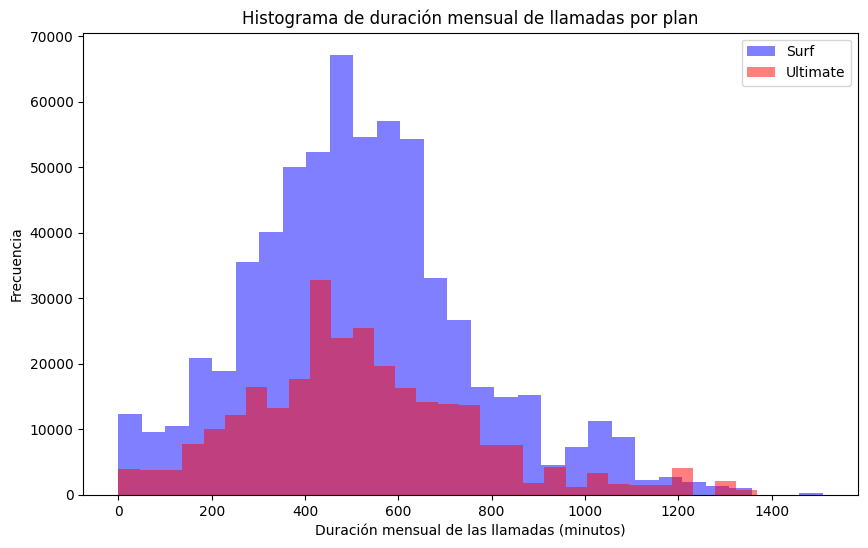

In [29]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
import matplotlib.pyplot as plt

# Filtrar los datos por plan
surf_data = merged_data_with_plan[merged_data_with_plan['plan_name'] == 'surf']
ultimate_data = merged_data_with_plan[merged_data_with_plan['plan_name'] == 'ultimate']

# Seleccionar la columna de duración mensual de las llamadas para cada plan
surf_call_duration = surf_data['minutes_per_month']
ultimate_call_duration = ultimate_data['minutes_per_month']

# Configurar el histograma
plt.figure(figsize=(10, 6))
plt.hist(surf_call_duration, bins=30, alpha=0.5, label='Surf', color='blue')
plt.hist(ultimate_call_duration, bins=30, alpha=0.5, label='Ultimate', color='red')

# Añadir etiquetas y título
plt.xlabel('Duración mensual de las llamadas (minutos)')
plt.ylabel('Frecuencia')
plt.title('Histograma de duración mensual de llamadas por plan')
plt.legend()

# Mostrar el histograma
plt.show()



In [ ]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

import matplotlib.pyplot as plt

# Agrupar los datos por plan y mes y calcular la duración promedio de llamadas
avg_call_duration = merged_data_with_plan.groupby(['plan_name', 'month_x'])['minutes_per_month'].mean().unstack()

# Crear el gráfico de barras
avg_call_duration.plot(kind='bar', figsize=(10, 6))
plt.title('Duración Promedio de Llamadas por Plan y por Mes')
plt.xlabel('Mes')
plt.ylabel('Duración Promedio de Llamadas (minutos)')
plt.xticks(rotation=45)
plt.legend(title='Month')
plt.show()


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [30]:
# Calcula la media y la varianza de la duración mensual de llamadas.
call_duration_stats = merged_data_with_plan.groupby('plan_name')['minutes_per_month'].agg(['mean', 'var'])
# Mostrar los resultados
print(call_duration_stats)


                 mean           var
plan_name                          
surf       518.266888  56656.369391
ultimate   523.164233  61627.324440


In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# merged_data_with_plan tiene una columna 'plan_name' y 'minutes_per_month'
plt.figure(figsize=(12, 6))

# Crear el diagrama de caja
sns.boxplot(data=merged_data_with_plan, x='plan_name', y='minutes_per_month')

# Configurar el título y las etiquetas
plt.title('Distribución de la Duración Mensual de Llamadas por Plan')
plt.xlabel('Plan')
plt.ylabel('Duración de Llamadas (Minutos)')

# Mostrar el gráfico
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]


<span style="color:blue">Segun a los diagramas de cajas estamos viendo medias muy parecidas entre cada plan ,tambien se puede observar que la mayoria de los usuarios o muchos usuarios sobrepasan los limites del plan por consiguiente les cobran un costo extra al plan respectivo , donde visualmente se puede ver que los usuarios del plan surf tienen mas apasarse de los minutros , esto me hace preguntar el plan es suficiente ? </span>

### Mensajes

In [ ]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

import matplotlib.pyplot as plt

# Configurar el gráfico de caja
plt.figure(figsize=(10, 6))
plt.boxplot([merged_data_with_plan[merged_data_with_plan['plan_name'] == 'surf']['messages_per_month'], 
             merged_data_with_plan[merged_data_with_plan['plan_name'] == 'ultimate']['messages_per_month']],
            labels=['Surf', 'Ultimate'])
plt.xlabel('Plan')
plt.ylabel('Número de mensajes')
plt.title('Comparación del número de mensajes por plan')

# Mostrar el gráfico
plt.show()

In [ ]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

import matplotlib.pyplot as plt

# Configurar el gráfico de caja
plt.figure(figsize=(10, 6))
plt.boxplot([merged_data_with_plan[merged_data_with_plan['plan_name'] == 'surf']['traffic_per_month'], 
             merged_data_with_plan[merged_data_with_plan['plan_name'] == 'ultimate']['traffic_per_month']],
            labels=['Surf', 'Ultimate'])
plt.xlabel('Plan')
plt.ylabel('Tráfico de Internet (GB)')
plt.title('Comparación del tráfico de Internet por plan')

# Mostrar el gráfico
plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]
<span style="color:blue">es un caso parecido al los minutos que cada usuario sobrepasa , en este ejemplo vemos un poco mas similares entre cada plan . sin embargo parece ser visualmente que los usuarios de surf tambien mandan mas mensajes que los usuarios del plan ultimate </span>

### Internet

In [ ]:
# Comprara el número de gigabytes que tienden a usar cada mes los usuarios de cada plan
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Filtrar los datos para cada plan
surf_traffic = merged_data_with_plan[merged_data_with_plan['plan_name'] == 'surf']['traffic_per_month']
ultimate_traffic = merged_data_with_plan[merged_data_with_plan['plan_name'] == 'ultimate']['traffic_per_month']

# Convertir los datos 
surf_traffic_gb = surf_traffic 
ultimate_traffic_gb = ultimate_traffic

# Calcular la media y la desviación estándar para cada plan
surf_mean, surf_std = surf_traffic_gb.mean(), surf_traffic_gb.std()
ultimate_mean, ultimate_std = ultimate_traffic_gb.mean(), ultimate_traffic_gb.std()

# Crear un rango de valores para el eje x
x_surf = np.linspace(min(surf_traffic_gb), max(surf_traffic_gb), 100)
x_ultimate = np.linspace(min(ultimate_traffic_gb), max(ultimate_traffic_gb), 100)

# Calcular la función de densidad de probabilidad para cada plan
surf_pdf = norm.pdf(x_surf, surf_mean, surf_std)
ultimate_pdf = norm.pdf(x_ultimate, ultimate_mean, ultimate_std)

# Configurar el gráfico
plt.figure(figsize=(14, 7))

# Histograma para el plan Surf
plt.hist(surf_traffic_gb, bins=30, density=True, alpha=0.5, color='blue', label='Surf')

# Distribución normal para el plan Surf
plt.plot(x_surf, surf_pdf, color='blue')

# Histograma para el plan Ultimate
plt.hist(ultimate_traffic_gb, bins=30, density=True, alpha=0.5, color='orange', label='Ultimate')

# Distribución normal para el plan Ultimate
plt.plot(x_ultimate, ultimate_pdf, color='orange')

# Etiquetas y título
plt.xlabel('Tráfico de Internet (GB)')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución del tráfico de Internet por plan')

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
surf_traffic.describe()


In [ ]:
ultimate_traffic.describe()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

<span style="color:blue">el trafico de datos que los usuarios de cada plan tiene tienen tendencia muy similar , como se puede observar en la funcion describe , los promedios casi no varian , pero hay que destacar que los usuarios del plan surf son mas que los de ultimate </span>

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [ ]:
import seaborn as sns

# Filtrar los datos de ingresos por plan
surf_revenue = merged_data_with_plan[merged_data_with_plan['plan_name'] == 'surf']['monthly_revenue']
ultimate_revenue = merged_data_with_plan[merged_data_with_plan['plan_name'] == 'ultimate']['monthly_revenue']

# Calcular estadísticas descriptivas para cada plan
surf_stats = surf_revenue.describe()
ultimate_stats = ultimate_revenue.describe()

print("Estadísticas descriptivas para el plan Surf:")
print(surf_stats)
print("\nEstadísticas descriptivas para el plan Ultimate:")
print(ultimate_stats)

# Calcular la media y la desviación estándar para cada plan
surf_mean, surf_std = surf_revenue.mean(), surf_revenue.std()
ultimate_mean, ultimate_std = ultimate_revenue.mean(), ultimate_revenue.std()

# Crear un rango de valores para el eje x
x_surf = np.linspace(min(surf_revenue), max(surf_revenue), 100)
x_ultimate = np.linspace(min(ultimate_revenue), max(ultimate_revenue), 100)

# Calcular la función de densidad de probabilidad para cada plan
surf_pdf = norm.pdf(x_surf, surf_mean, surf_std)
ultimate_pdf = norm.pdf(x_ultimate, ultimate_mean, ultimate_std)

# Configurar el gráfico
plt.figure(figsize=(14, 7))

# Histograma para el plan Surf
plt.hist(surf_revenue, bins=30, density=True, alpha=0.5, color='blue', label='Surf')

# Distribución normal para el plan Surf
plt.plot(x_surf, surf_pdf, color='blue')

# Histograma para el plan Ultimate
plt.hist(ultimate_revenue, bins=30, density=True, alpha=0.5, color='orange', label='Ultimate')

# Distribución normal para el plan Ultimate
plt.plot(x_ultimate, ultimate_pdf, color='orange')

# Etiquetas y título
plt.xlabel('Ingresos mensuales ($)')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución de ingresos mensuales por plan')

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

# Trazar boxplots para visualizar la distribución de ingresos
plt.figure(figsize=(14, 7))
sns.boxplot(data=merged_data_with_plan, x='plan_name', y='monthly_revenue')
plt.xlabel('Plan')
plt.ylabel('Ingresos mensuales ($)')
plt.title('Distribución de ingresos mensuales por plan')
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones
</div>

In [ ]:
surf_revenue.sample(20) 
ultimate_revenue.sample(20) 


In [ ]:

from scipy import stats

# Filtrar los datos de ingresos por plan
surf_revenue = merged_data_with_plan[merged_data_with_plan['plan_name'] == 'surf']['monthly_revenue']
ultimate_revenue = merged_data_with_plan[merged_data_with_plan['plan_name'] == 'ultimate']['monthly_revenue']

# Realizar la prueba t de muestras independientes
t_statistic, p_value = stats.ttest_ind(surf_revenue, ultimate_revenue)

# Mostrar los resultados
print("Resultados de la prueba t:")
print(f"Estadístico t: {t_statistic}")
print(f"Valor p: {p_value}")

alpha = 0.05  # Nivel de significancia

if p_value < alpha:
    print("\nRechazamos la hipótesis nula: Hay diferencias significativas entre los ingresos mensuales de los planes.")
else:
    print("\nNo podemos rechazar la hipótesis nula: No hay diferencias significativas entre los ingresos mensuales de los planes.")

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [46]:
# Filtrar los datos por plan
surf_data = merged_data_with_plan[merged_data_with_plan['plan_name'] == 'surf']
ultimate_data = merged_data_with_plan[merged_data_with_plan['plan_name'] == 'ultimate']

# Obtener los ingresos mensuales por plan
surf_revenue = surf_data['monthly_revenue'].dropna()
ultimate_revenue = ultimate_data['monthly_revenue'].dropna()

# Realizar la prueba t de muestras independientes
t_statistic, p_value = stats.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)  # equal_var=False para asumir varianzas diferentes

# Mostrar los resultados
print("Resultados de la prueba t para ingresos entre Surf y Ultimate:")
print(f"Estadístico t: {t_statistic}")
print(f"Valor p: {p_value}")

# Nivel de significancia (alfa)
alpha = 0.05

# Interpretar los resultados
if p_value < alpha:
    print("\nRechazamos la hipótesis nula: Hay diferencias significativas entre los ingresos mensuales de los planes Surf y Ultimate.")
else:
    print("\nNo podemos rechazar la hipótesis nula: No hay diferencias significativas entre los ingresos mensuales de los planes Surf y Ultimate.")


Resultados de la prueba t para ingresos entre Surf y Ultimate:
Estadístico t: -7.952094891333888
Valor p: 3.1703905481135734e-15

Rechazamos la hipótesis nula: Hay diferencias significativas entre los ingresos mensuales de los planes Surf y Ultimate.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

In [45]:
from scipy import stats
import pandas as pd

# Filtrar los datos por plan
surf_data = merged_data_with_plan[merged_data_with_plan['plan_name'] == 'surf']
ultimate_data = merged_data_with_plan[merged_data_with_plan['plan_name'] == 'ultimate']

# Obtener los ingresos mensuales por plan
surf_revenue = surf_data['monthly_revenue']
ultimate_revenue = ultimate_data['monthly_revenue']

# Realizar la prueba t de muestras independientes con equal_var=False
t_statistic, p_value = stats.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)

# Mostrar los resultados
print("Resultados de la prueba t:")
print(f"Estadístico t: {t_statistic}")
print(f"Valor p: {p_value}")

# Nivel de significancia (alfa)
alpha = 0.05

# Interpretar los resultados
if p_value < alpha:
    print("\nRechazamos la hipótesis nula: Hay diferencias significativas entre los ingresos mensuales de los planes.")
else:
    print("\nNo podemos rechazar la hipótesis nula: No hay diferencias significativas entre los ingresos mensuales de los planes.")


Resultados de la prueba t:
Estadístico t: nan
Valor p: nan

No podemos rechazar la hipótesis nula: No hay diferencias significativas entre los ingresos mensuales de los planes.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [ ]:
# Prueba las hipótesis
from scipy import stats
import pandas as pd

# Filtrar los datos por área NY-NJ y otras regiones
ny_nj_data = merged_data_with_plan[merged_data_with_plan['city'].str.contains('ny-nj')]
other_region_data = merged_data_with_plan[~merged_data_with_plan['city'].str.contains('ny-nj')]

# Obtener los ingresos mensuales por área
ny_nj_revenue = ny_nj_data['monthly_revenue']
other_region_revenue = other_region_data['monthly_revenue']

# Realizar la prueba t de muestras independientes
t_statistic, p_value = stats.ttest_ind(ny_nj_revenue, other_region_revenue, equal_var=False)  # equal_var=False para asumir varianzas diferentes

# Mostrar los resultados
print("Resultados de la prueba t:")
print(f"Estadístico t: {t_statistic}")
print(f"Valor p: {p_value}")

# Nivel de significancia (alfa)
alpha = 0.05

# Interpretar los resultados
if p_value < alpha:
    print("\nRechazamos la hipótesis nula: El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.")
else:
    print("\nNo podemos rechazar la hipótesis nula: El ingreso promedio de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones.")



<div class="alert alert-block alert-danger">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Te recomiendo verificar que dentro de las variables que usamos para las pruebas de hipótesis no contamos con valores nulos que esten haciendo que el valor p sea nan
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]


<span style="color:blue">Estos resultados me dicen que hay una diferencia significativa en los ingresos promedio entre los dos grupos comparados (por ejemplo, entre los usuarios de los planes Ultimate y Surf o entre los usuarios de NY-NJ y otras regiones). La magnitud del estadístico t y el valor p cercano a 0 indican que esta diferencia es muy fuerte y no es debida al azar. </span>






<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera, así como juntar la información. Además, considero que el análisis con las gráficas y con las pruebas de hipótesis es muy acertado. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:

* Realizar un análisis inicial de registros duplicados en todas las bases de datos

*  verificar las pruebs de hipótesis
</div>

In [44]:
import pandas as pd

# Analizar registros duplicados
calls = pd.read_csv("/datasets/megaline_calls.csv")
internet = pd.read_csv("/datasets/megaline_internet.csv")
messages = pd.read_csv("/datasets/megaline_messages.csv")
plans = pd.read_csv("/datasets/megaline_plans.csv")
users = pd.read_csv("/datasets/megaline_users.csv")
dataframes = {'calls': calls, 'internet': internet, 'messages': messages, 'plans': plans, 'users': users}

for name, df in dataframes.items():
    print(f"DataFrame {name}:")
    print(f"Total registros: {len(df)}")
    print(f"Registros duplicados: {df.duplicated().sum()}")
    print("-" * 40)

DataFrame calls:
Total registros: 137735
Registros duplicados: 0
----------------------------------------
DataFrame internet:
Total registros: 104825
Registros duplicados: 0
----------------------------------------
DataFrame messages:
Total registros: 76051
Registros duplicados: 0
----------------------------------------
DataFrame plans:
Total registros: 2
Registros duplicados: 0
----------------------------------------
DataFrame users:
Total registros: 500
Registros duplicados: 0
----------------------------------------


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes! Que sigas disfrutando los siguientes cursos!
</div>